In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style ="whitegrid")

In [4]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 4.53 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [5]:
titanic_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/Titanic-Dataset.csv')
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
titanic_df.shape

(891, 12)

In [7]:
print("dataset information")
titanic_df.info()


dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [9]:
titanic_df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [10]:
print("total null values")
titanic_df.isna().sum()

total null values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
median = titanic_df['Age'].median()
titanic_df['Age'].fillna(median, inplace = True)

/tmp/ipython-input-3575247393.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(median, inplace = True)


In [12]:
median_age = titanic_df['Age'].mean()
titanic_df.fillna({'Age' : median},inplace=True)
titanic_df['Age'].isna().sum()
print("missing values after cleaning:")
print(titanic_df[['Age','Embarked','Cabin']].isna().sum())


missing values after cleaning:
Age           0
Embarked      2
Cabin       687
dtype: int64


In [13]:
titanic_df['Has_Cabin'] = titanic_df['Cabin'].notna().astype(int)
titanic_df.drop('Cabin',axis=1,inplace = True)

In [14]:
titanic_df.value_counts('Has_Cabin')


Has_Cabin
0    687
1    204
Name: count, dtype: int64

In [15]:
mode =titanic_df['Embarked'].mode()
mode_embarked = titanic_df['Embarked'].mode()[0]
titanic_df.fillna({'Embarked':mode_embarked},inplace =True)

In [16]:
print("missing values after cleaning")
titanic_df.isna().sum()

missing values after cleaning


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

Analyzing categorical features:


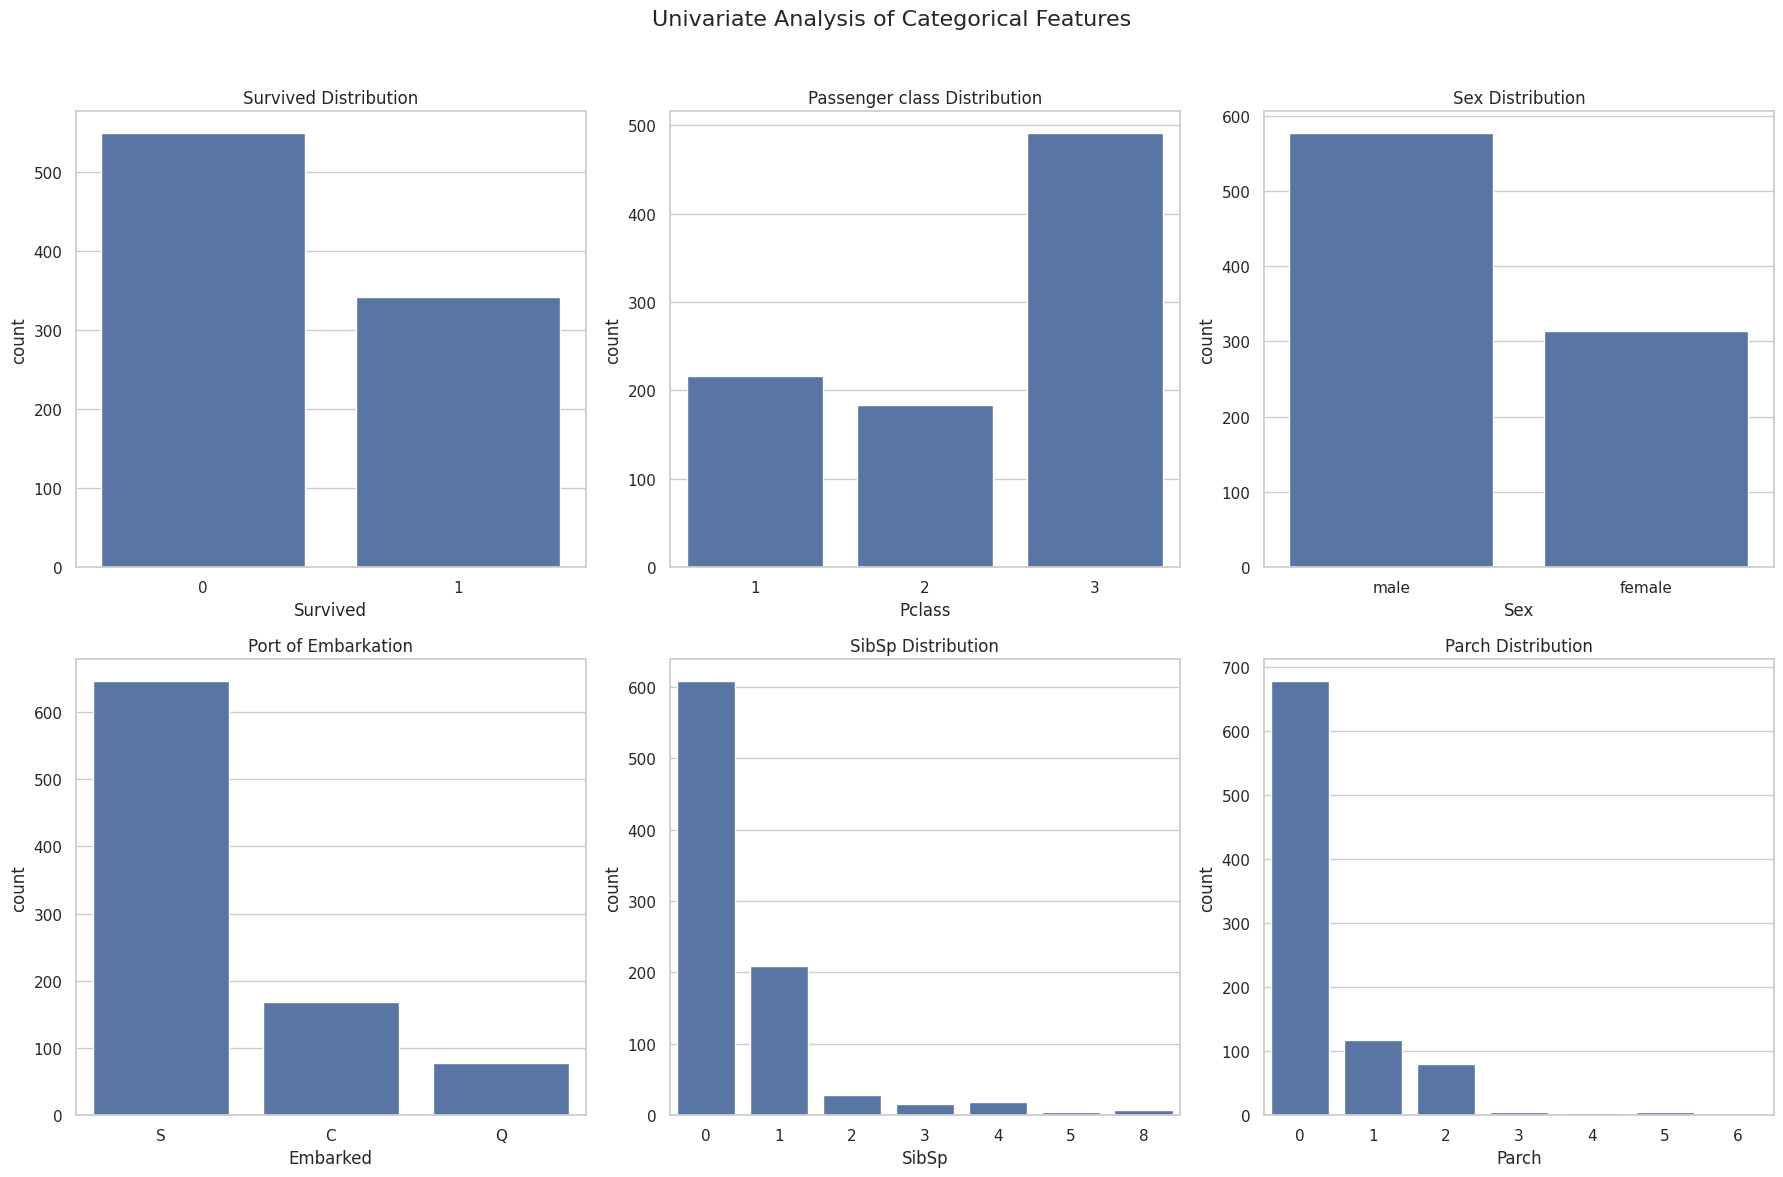

In [27]:
print("Analyzing categorical features:")
fig, axes = plt.subplots(2,3, figsize = (18,12))
fig.suptitle('Univariate Analysis of Categorical Features',fontsize = 16)

sns.countplot(ax=axes[0,0],x='Survived',data=titanic_df).set_title('Survived Distribution')
sns.countplot(ax=axes[0,1],x='Pclass',data=titanic_df).set_title('Passenger class Distribution')
sns.countplot(ax=axes[0,2],x='Sex',data=titanic_df).set_title('Sex Distribution')
sns.countplot(ax=axes[1,0],x='Embarked',data=titanic_df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1,1],x='SibSp',data=titanic_df).set_title('SibSp Distribution')
sns.countplot(ax=axes[1,2],x='Parch',data=titanic_df).set_title('Parch Distribution')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


analyzing numerical features: 


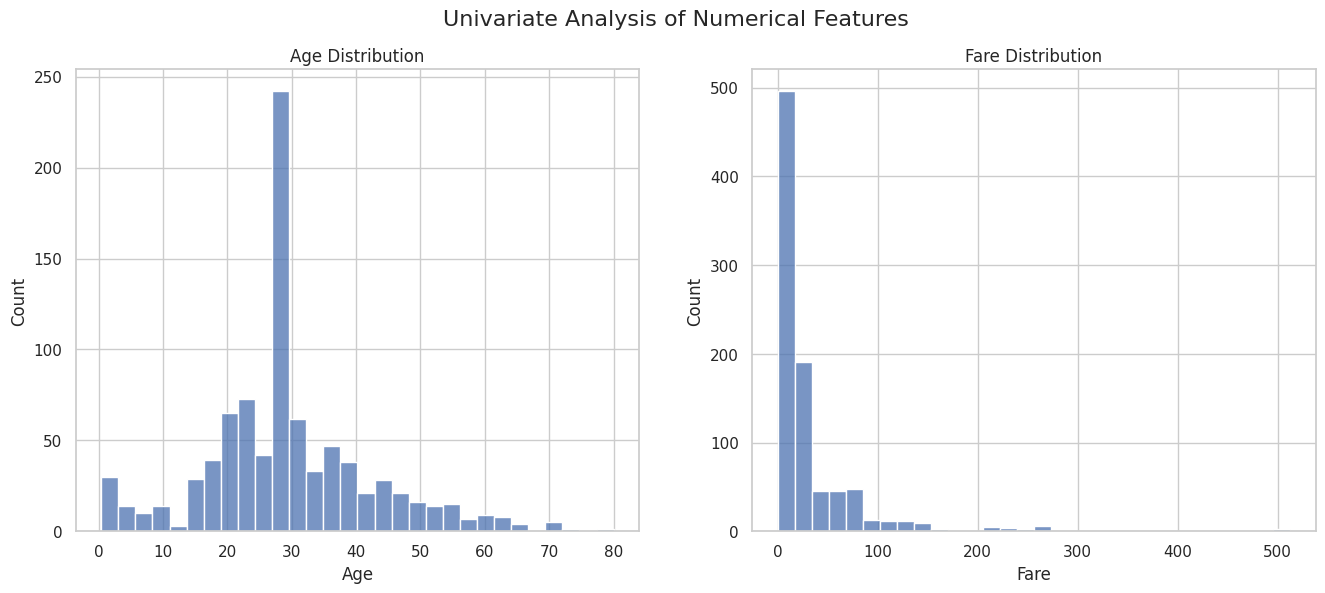

In [33]:
print('\nanalyzing numerical features: ')
fig, axes = plt.subplots(1, 2, figsize = (16,6))
fig.suptitle('Univariate Analysis of Numerical Features',fontsize = 16)

sns.histplot(ax=axes[0],data=titanic_df,x='Age',bins=30).set_title('Age Distribution')
sns.histplot(ax=axes[1],data=titanic_df,x='Fare',bins=30).set_title('Fare Distribution')
plt.show()

Analyzing bivariate features: features vs survial


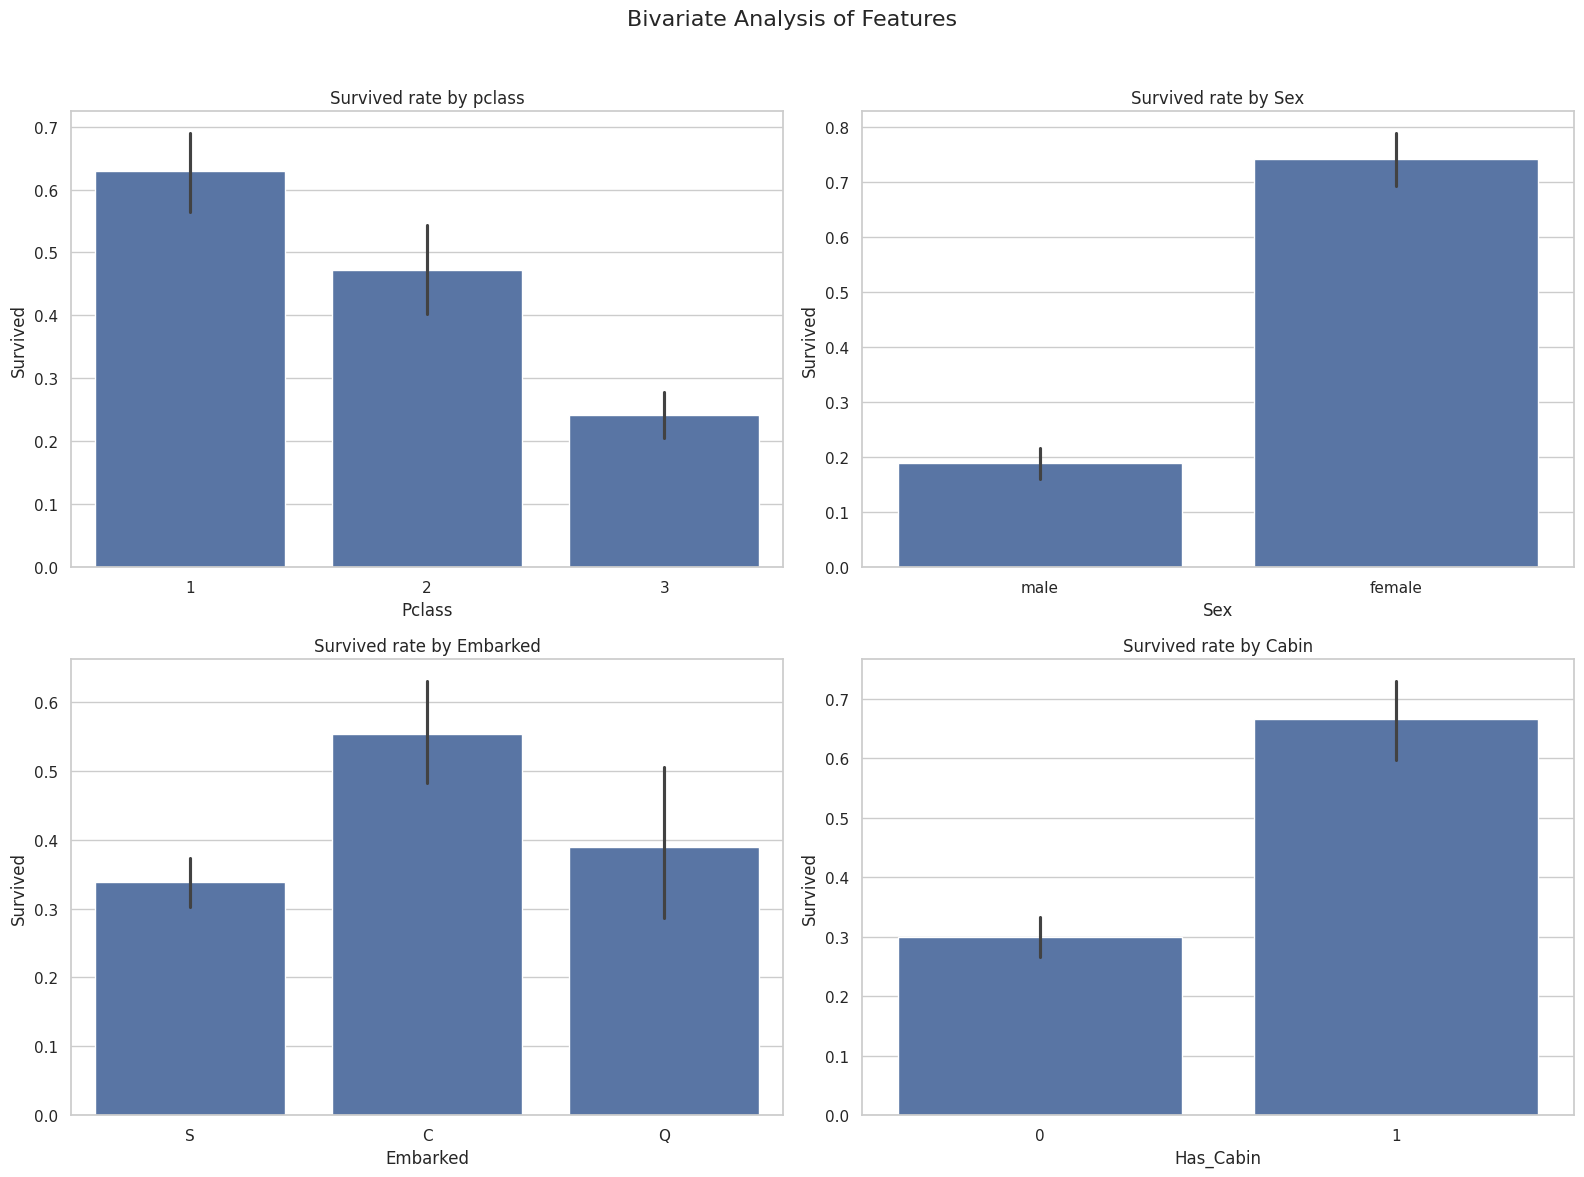

In [34]:
print('Analyzing bivariate features: features vs survial')
fig,axes = plt.subplots(2,2,figsize=(16,12))
fig.suptitle('Bivariate Analysis of Features',fontsize = 16)

sns.barplot(ax=axes[0,0],x='Pclass',y='Survived',data=titanic_df).set_title('Survived rate by pclass')
sns.barplot(ax=axes[0,1],x='Sex', y='Survived',data=titanic_df).set_title('Survived rate by Sex')
sns.barplot(ax=axes[1,0],x='Embarked',y='Survived',data=titanic_df).set_title('Survived rate by Embarked')
sns.barplot(ax=axes[1,1],x='Has_Cabin',y='Survived',data=titanic_df).set_title('Survived rate by Cabin')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

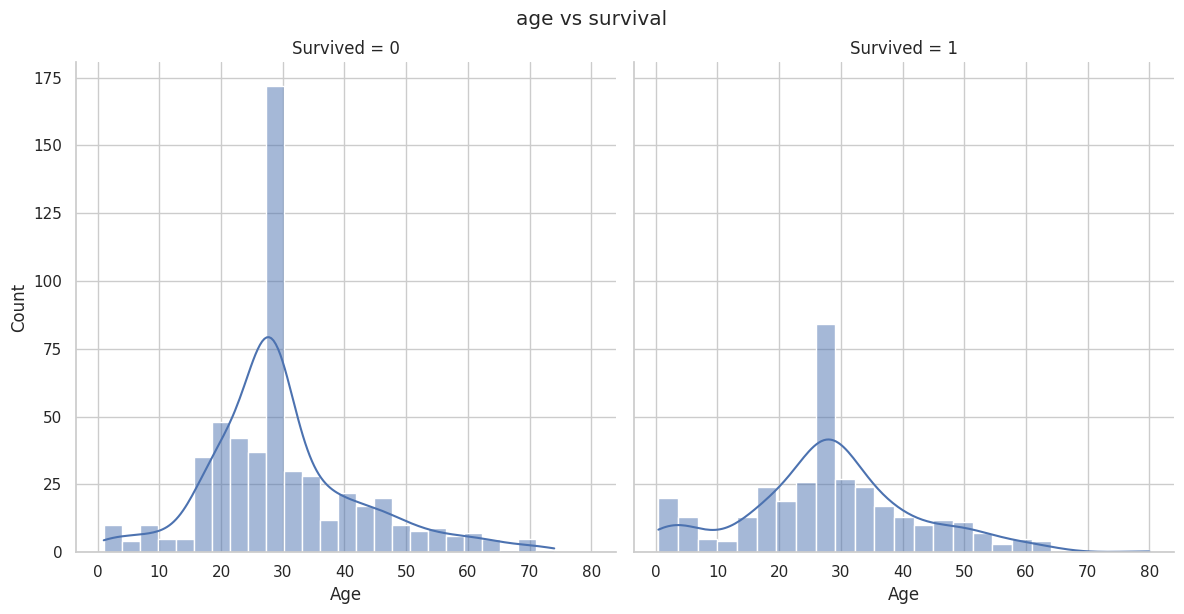

In [46]:
#age vs survival
g = sns.FacetGrid(titanic_df,col='Survived',height=6)
g.map(sns.histplot,'Age',bins=25,kde=True)
plt.suptitle("age vs survival",y=1.02)
plt.show()

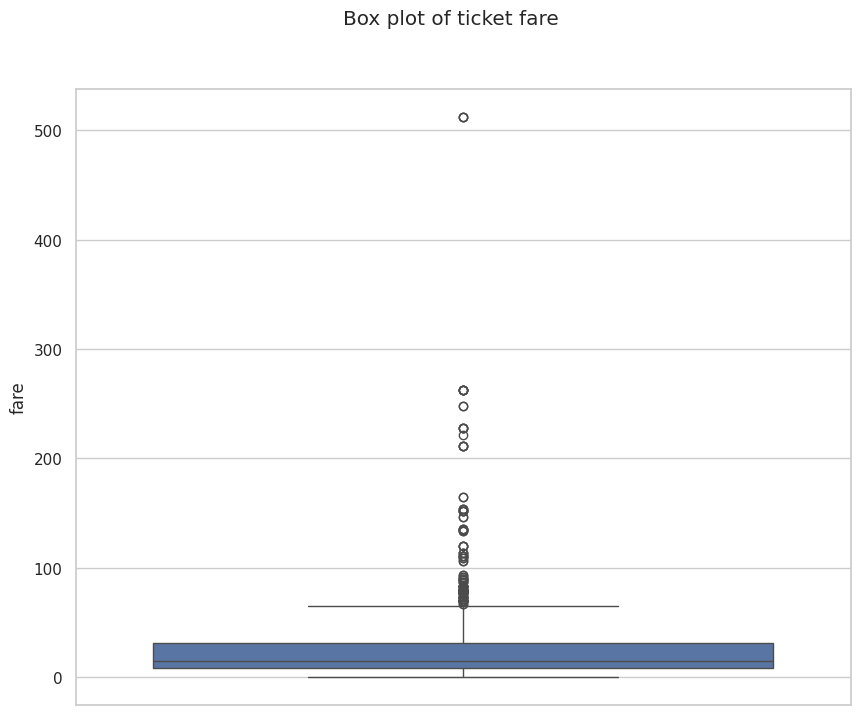

In [48]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Fare',data=titanic_df)
plt.suptitle("Box plot of ticket fare")
plt.ylabel('fare')
plt.show()

In [50]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize']==1 , 'IsAlone']=1
print("Created 'FamilySize' and 'IsAlone' features:")
titanic_df[['FamilySize','IsAlone']].head()

Created 'FamilySize' and 'IsAlone' features:


FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

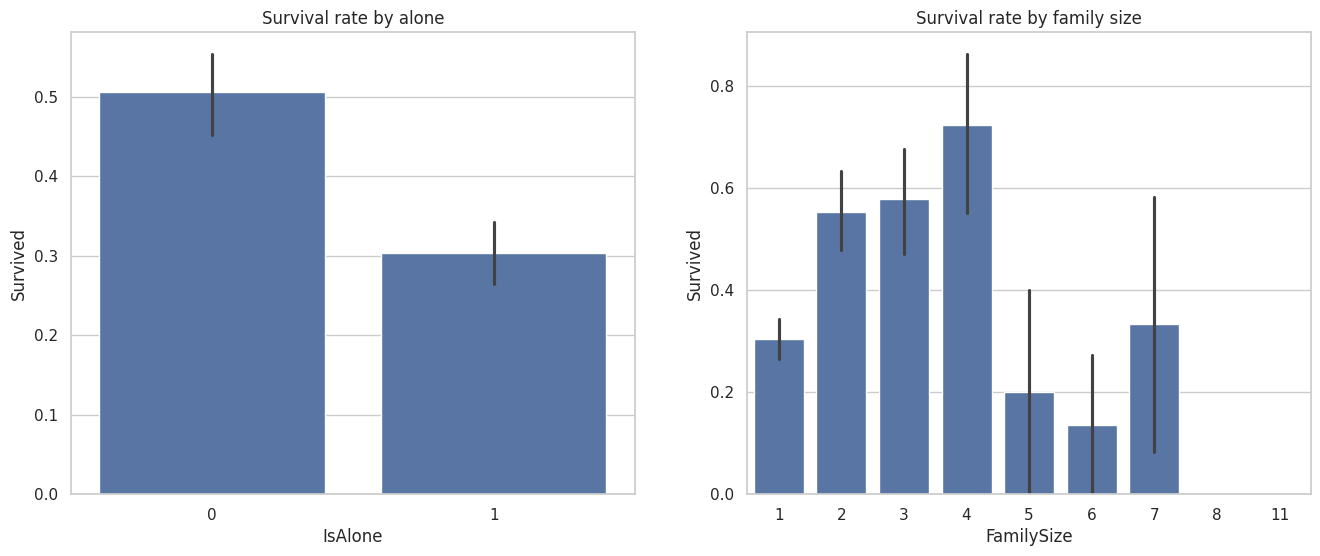

In [51]:
fig, axes = plt.subplots(1,2,figsize=(16,6))
sns.barplot(ax=axes[0], x='IsAlone',y='Survived',data=titanic_df).set_title('Survival rate by alone')
sns.barplot(ax=axes[1], x='FamilySize',y='Survived',data=titanic_df).set_title('Survival rate by family size')
plt.show()

In [62]:
# 3. Extract 'Title' from the 'Name' column
titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Let's see the different titles
print("Extracted Titles:")
titanic_df['Title'].value_counts()

Extracted Titles:


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

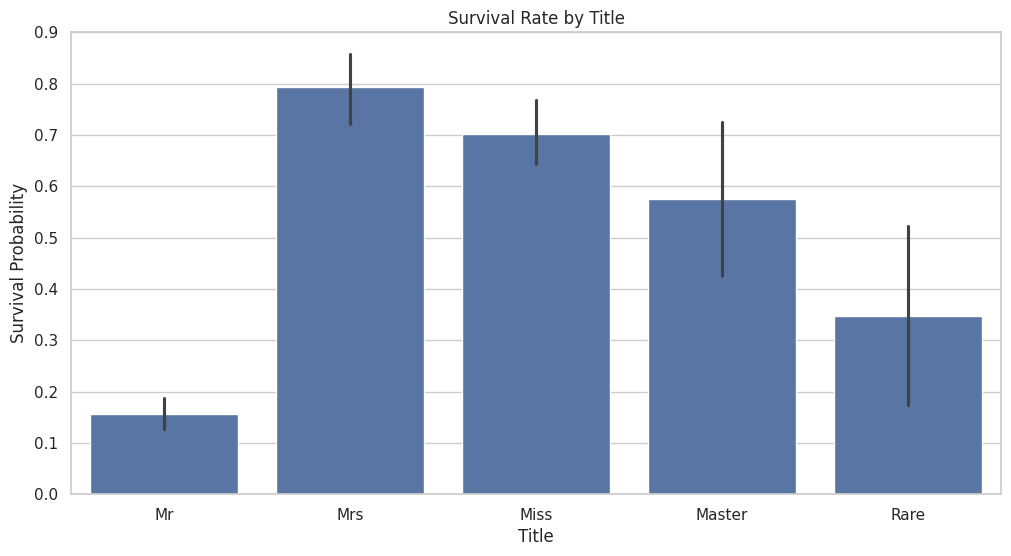

In [63]:
# Simplify the titles by grouping rare ones into a 'Rare' category
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Survived', data=titanic_df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

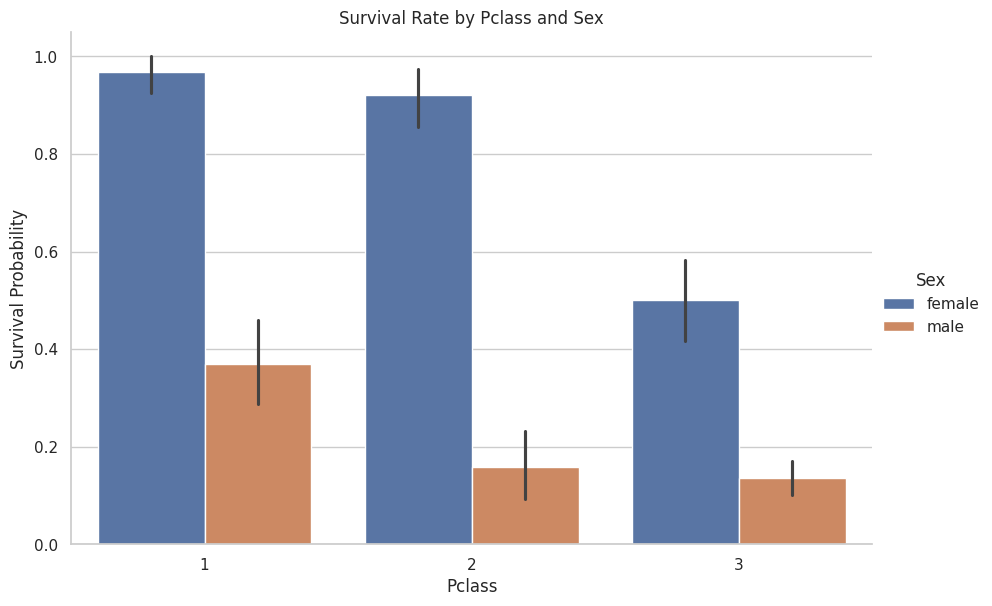

In [64]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

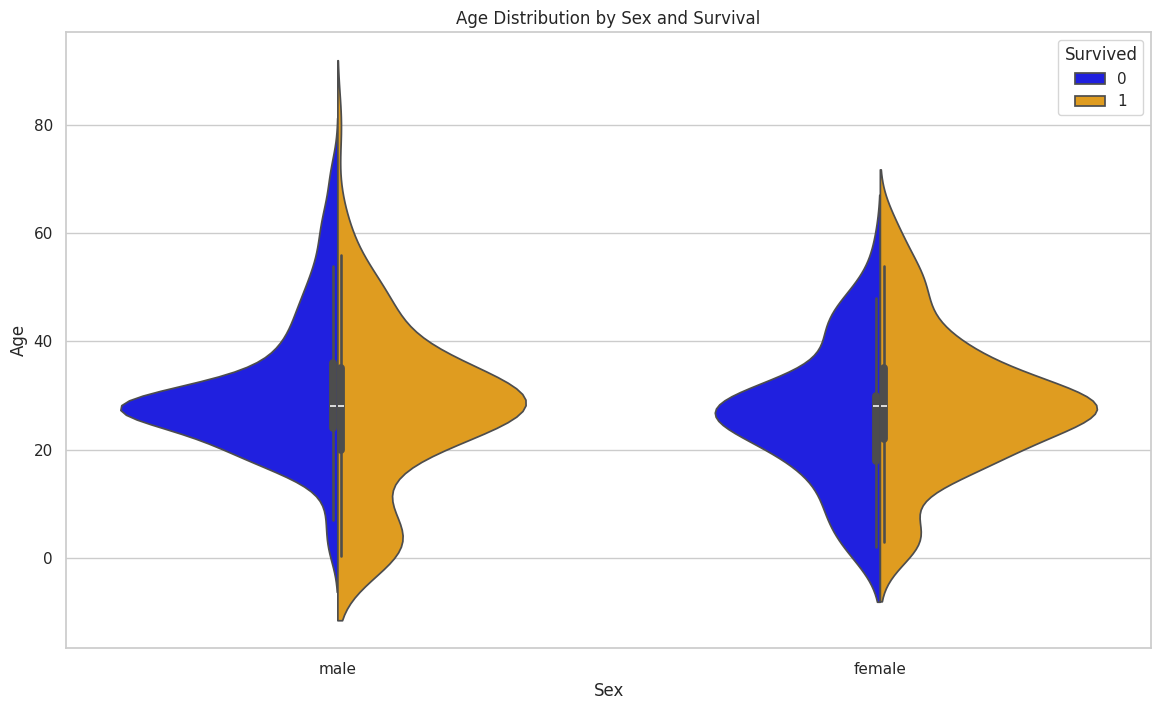

In [65]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

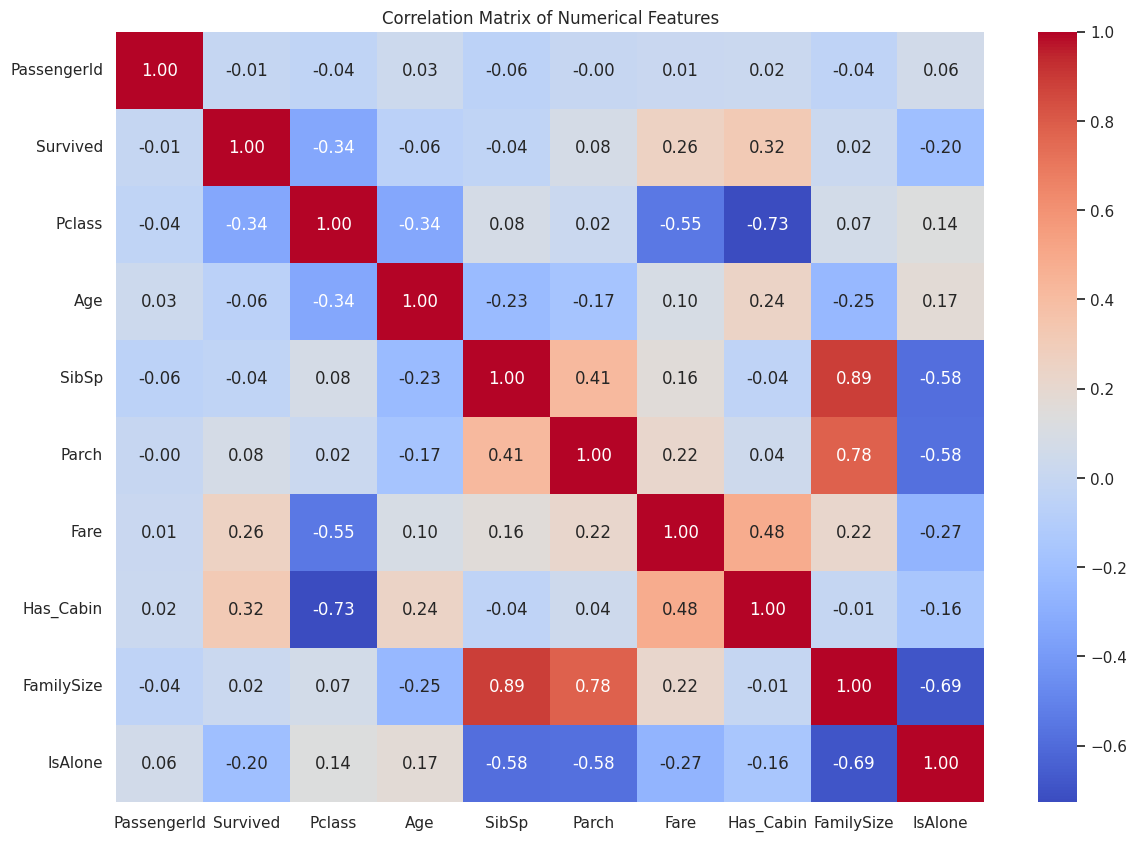

In [66]:
plt.figure(figsize=(14, 10))
numeric_cols = titanic_df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [67]:
import pandas as pd

# Create a sample DataFrame
sample_data = {'col1': [1, 2, 3, 4],
               'col2': ['A', 'B', 'C', 'D'],
               'col3': [True, False, True, False]}
sample_df = pd.DataFrame(sample_data)

# Display the sample DataFrame
print("Sample DataFrame:")
display(sample_df)

Sample DataFrame:


col1 col2   col3
0     1    A   True
1     2    B  False
2     3    C   True
3     4    D  False

In [69]:
!pip install ydata-profiling -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00


In [70]:
from ydata_profiling import ProfileReport
profile = ProfileReport(titanic_df, title="Titanic Dataset Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 55.61it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [72]:
profile.to_file("Siddarth_titanic_dataset_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]